# HW6: Clustering I (K-means)

### __Prepared libraries can be used__

In K-means clustering, we are given points x
$x_1, ..., x_n ∈ R^d$
 and an integer $K > 1$, and our goal is to
minimize the within-cluster sum of squares (also known as the k-means objective)

$J(C, L)=\sum_{i=1}^n ||x_i - C_{l_i}||^2$

where $C = (C_1, ..., C_K)$ are the cluster centers $(Cj ∈ R^d)$, and $L = (l_1, ..., l_n)$ are the cluster assignments ($l_i ∈ \{1, ..., K\}$).

Finding the exact minimum of this function is computationally difficult. The most common algorithm for finding an approximate solution is Lloyd’s algorithm, which takes as input the set of points and some initial cluster centers C, and proceeds as follows:

1. Keeping C fixed, find cluster assignments L to minimize J(C, L). This step only involves finding nearest neighbors. Ties can be broken using arbitrary (but consistent) rules.
1. Keeping L fixed, find C to minimize J(C, L). This is a simple step that only involves averaging points within a cluster.
1. If any of the values in L changed from the previous iteration (or if this was the first iteration), repeat from step i.
1. Return C and L.

The initial cluster centers C given as input to the algorithm are often picked randomly from $x_1, ..., x_n$. In practice, we often repeat multiple runs of Lloyd’s algorithm with different initializations, and pick the best resulting clustering in terms of the k-means objective. You’re about to see why.

#### Import Libraries

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing

In [3]:
Data1 = np.genfromtxt('clustering_datasets/first_clustering_dataset.csv', delimiter=',')
Data2 = np.genfromtxt('clustering_datasets/second_clustering_dataset.csv', delimiter=',')
Data3 = np.genfromtxt('clustering_datasets/third_clustering_dataset.csv', delimiter=',')

### a)
Implement Lloyd’s algorithm. Run it until convergence 200 times, each time initializing using K cluster centers picked at random from the set ${x_1, ..., x_n}$, with $K = 5$ clusters,
on the 500 two dimensional data points in *hw6_first_clustering_dataset.csv*. Plot in a single figure the original data, and all $200 × 5$ cluster centers given by each run of Lloyd’s algorithm. You can play around with the plotting options such as point sizes so that the cluster centers are clearly visible. Also compute the minimum, mean, and standard deviation of the within-cluster sums of squares for the clusterings given by each of the 200 runs.

If you get an empty cluster, it has no center of mass. In this case, initialize the empty cluster center again (not all centers).

#### Plot First Data

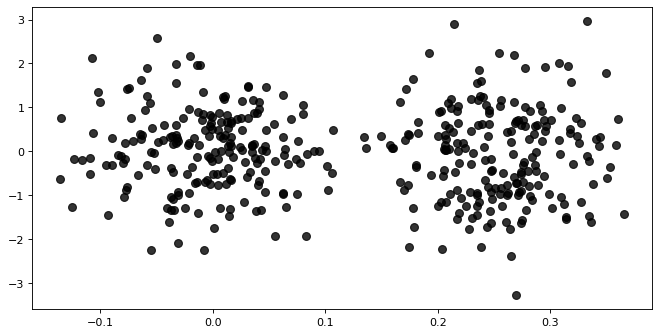

In [4]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(Data1[:,0],Data1[:,1], s = 50, c = 'black', alpha = 0.8)
plt.show()

In [5]:
HistCentroids = []
Hist = np.array([[0,0]])
for i in range(200):
    kmeans = KMeans(n_clusters=5, init='random',n_init=1)
    kmeans.fit(Data1)
    HistCentroids.append(kmeans.cluster_centers_)
    Hist = np.concatenate((Hist,kmeans.cluster_centers_))
Hist = np.delete(Hist,0,axis=0)

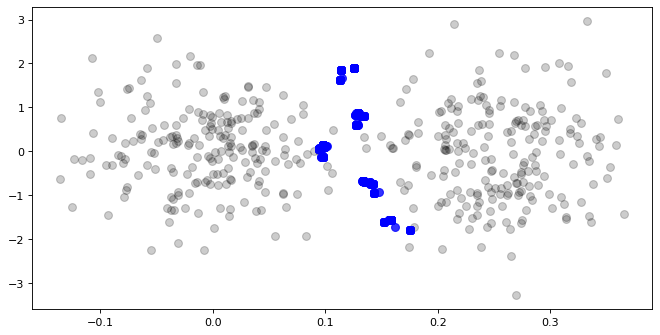

In [6]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(Data1[:,0],Data1[:,1], s = 50, c = 'black', alpha = 0.2)
plt.scatter(Hist[:,0],Hist[:,1], s = 50, c = 'blue', alpha = 0.8)
plt.show()

### b)

Kmeans++ is an initialization algorithm for K-means proposed by David Arthur
and Sergei Vassilvitskii in 2007:

1. Pick the first cluster center $C_1$ uniformly at random from the data $x_1, ..., x_n$. In other words, we first pick an index i uniformly at random from $\{1, ..., n\}$, then set $C_1 = x_i$.

2. For $j = 2, ..., K$:
  * For each data point, compute its distance $D_i$ to the nearest cluster center picked in a previous iteration:
  $D_i = \min_{j'=1,...,j-1}||x_i-C_{j'}||$
  * Pick the cluster center $C_j$ at random from $x_1, ..., x_n$ with probabilities proportional to $D^2_1,..., D^2_n$. Precisely, we pick an index $i$ at random from $\{1, ..., n\}$ with probabilities
equal to $\frac{D^2_1}{\sum_{i'=1}^n{D^2_{i'}}}, ...., \frac{D^2_n}{\sum_{i'=1}^n{D^2_{i'}}}$ , and set $C_j = x_i$.
3. Return C as the initial cluster  ssignments for Lloyd’s algorithm.


Replicate the figure and calculations in part (b) using Kmeans++ as the initialization algorithm, instead of picking C uniformly at random.

In [7]:
HistCentroids = []
Hist = np.array([[0,0]])
for i in range(200):
    kmeans = KMeans(n_clusters=5, init='k-means++',n_init=1)
    kmeans.fit(Data1)
    HistCentroids.append(kmeans.cluster_centers_)
    Hist = np.concatenate((Hist,kmeans.cluster_centers_))
Hist = np.delete(Hist,0,axis=0)

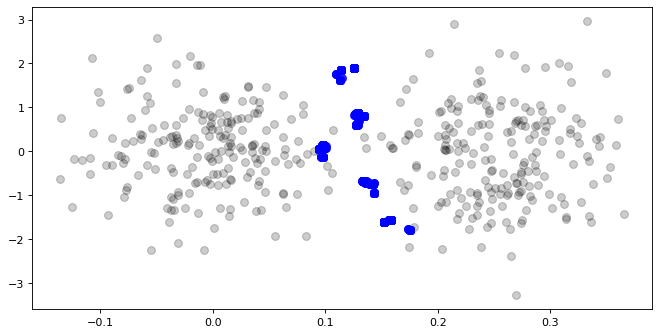

In [8]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(Data1[:,0],Data1[:,1], s = 50, c = 'black', alpha = 0.2)
plt.scatter(Hist[:,0],Hist[:,1], s = 50, c = 'blue', alpha = 0.8)
plt.show()

Hopefully your results make it clear how sensitive Lloyd’s algorithm is to initializations, even in
such a simple, two dimensional data set!

### c)

A common way to pick K is as follows. For each value of K in some range (e.g. $K = 1, ..., n$, or some subset), we find an approximate minimum of the k-means objective using our favorite algorithm
(e.g. multiple runs of randomly initialized Lloyd’s algorithm). Then we plot the resulting values of the k-means objective against the values of K. Often, if our data set is such that there exists a natural value for K, we see a “knee” in this plot, i.e. a value for K where the rate at which the within-cluster sum of squares is decreasing sharply reduces. This suggests we should use the value for K where this knee occurs. In the toy example in below Figure, this value would be K = 6.

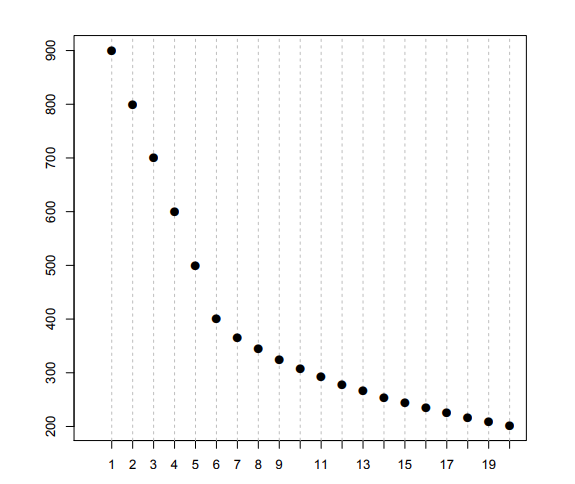

 Produce a plot similar to the one in Figure 1 for $K = 1, ..., 15$ using the data set in (b), and show where the “knee” is. For each value of K, run k-means with at least 200 initializations and pick the best resulting clustering (in terms of the objective) to ensure you get close to the global minimum.

In [9]:
def calculate_ssd(img1, img2):
    """Computing the sum of squared differences (SSD) between two images."""
    if img1.shape != img2.shape:
        print("Images don't have the same shape.")
        return
    return np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)

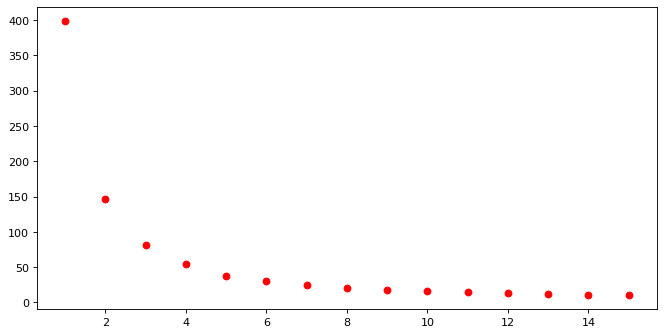

In [10]:
# first of all for K=1
losshist = []
for i in range(200):
    num = random.randint(0, Data1.shape[0]-1)
    data = Data1[num,:]
    sse = 0
    for j in range(Data1.shape[0]):
        sse += calculate_ssd(data,Data1[j,:])
    if i==0:
        bestsse = sse
    if bestsse>sse:
        bestsse = sse
        
#print(bestsse)
losshist.append(bestsse)
for K in range(2,16):
    kmeans = KMeans(n_clusters=K, init='k-means++',n_init=200)
    kmeans.fit(Data1)
    losshist.append(kmeans.inertia_)
    #print(kmeans.inertia_)
    
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(list(range(1,16)), losshist, 'ro')
plt.show()

**** your answer****

K=3 or K=4

### d)

 Repeat part (c) with the data set in *HW6_second_clustering_dataset.csv*. Find 2 knees in the resulting plot (you may need to plot the square root of the within-cluster sum of squares instead, in order to make the second knee
obvious). Explain why we get 2 knees for this data set (consider plotting the data to see what’s going on).

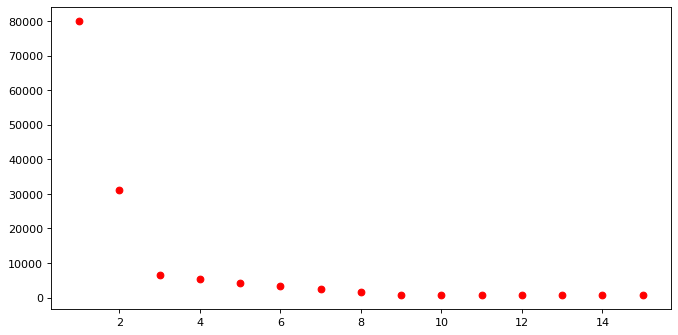

In [11]:
# first of all for K=1
#bestsse = 20000
losshist = []
for i in range(200):
    num = random.randint(0, Data2.shape[0]-1)
    data = Data2[num,:]
    sse = 0
    for j in range(Data2.shape[0]):
        sse += calculate_ssd(data,Data2[j,:])
    if i==0:
        #print('Hello')
        bestsse = sse
    if bestsse>sse:
        bestsse = sse
        
#print(bestsse)
losshist.append(bestsse)
for K in range(2,16):
    kmeans = KMeans(n_clusters=K, init='k-means++',n_init=200)
    kmeans.fit(Data2)
    losshist.append(kmeans.inertia_)
    #print(kmeans.inertia_)
    
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(list(range(1,16)), losshist, 'ro')
plt.show()


K=3 and K=9

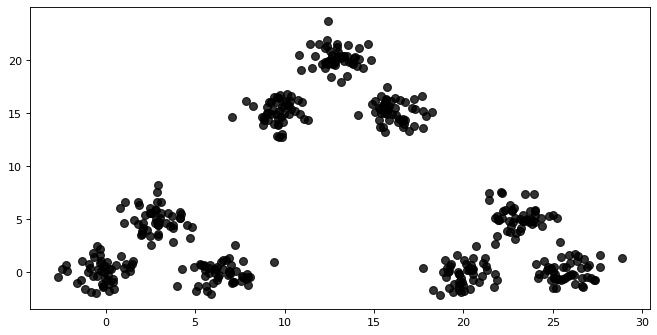

In [12]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(Data2[:,0],Data2[:,1], s = 50, c = 'black', alpha = 0.8)
plt.show()

**** your answer****

We conclude our exploration of k-means clustering with the critical importance of properly scaling the dimensions of your data.

### e)

 Load the data in *HW6_third_clustering_dataset.csv*.
csv. Perform k-means clustering on this data with K = 2 with 500 initializations. Plot the original data, and overplot the 2 cluster centers.

In [360]:
HistCentroids = []
Hist = np.array([[0,0]])
kmeans = KMeans(n_clusters=2, init='k-means++',n_init=500)
kmeans.fit(Data3)
HistCentroids.append(kmeans.cluster_centers_)
Hist = np.concatenate((Hist,kmeans.cluster_centers_))
Hist = np.delete(Hist,0,axis=0)

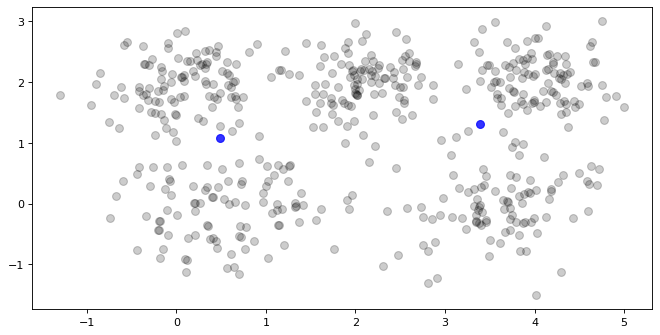

In [361]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(Data3[:,0],Data3[:,1], s = 50, c = 'black', alpha = 0.2)
plt.scatter(Hist[:,0],Hist[:,1], s = 50, c = 'blue', alpha = 0.8)
plt.show()

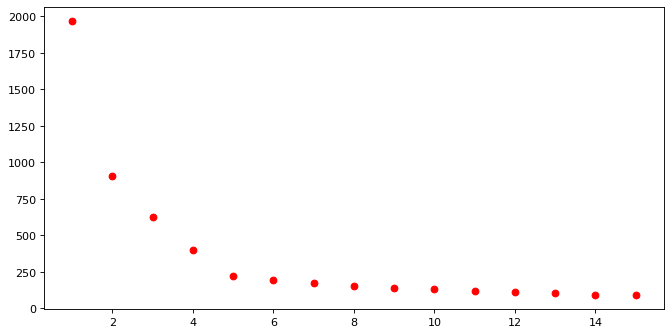

In [389]:
# first of all for K=1
#bestsse = 20000
losshist = []
for i in range(200):
    num = random.randint(0, Data3.shape[0]-1)
    data = Data3[num,:]
    sse = 0
    for j in range(Data3.shape[0]):
        sse += calculate_ssd(data,Data3[j,:])
    if i==0:
        #print('Hello')
        bestsse = sse
    if bestsse>sse:
        bestsse = sse
        
#print(bestsse)
losshist.append(bestsse)
for K in range(2,16):
    kmeans = KMeans(n_clusters=K, init='k-means++',n_init=200)
    kmeans.fit(Data3)
    losshist.append(kmeans.inertia_)
    #print(kmeans.inertia_)
    
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(list(range(1,16)), losshist, 'ro')
plt.show()


**** your answer****

### f)

Normalize the features in this data set, i.e. first center the data to be mean 0
in every dimension, then rescale each dimension to have unit variance. Repeat part (e) with this modified data.

In [362]:
Normalized_Data3 = Data3 - np.mean(Data3,axis=0)
Normalized_Data3 = Normalized_Data3 / np.std(Normalized_Data3,axis=0)

In [387]:
HistCentroids = []
Hist = np.array([[0,0]])
kmeans = KMeans(n_clusters=2, init='k-means++',n_init=500)
kmeans.fit(Normalized_Data3)
HistCentroids.append(kmeans.cluster_centers_)
Hist = np.concatenate((Hist,kmeans.cluster_centers_))
Hist = np.delete(Hist,0,axis=0)

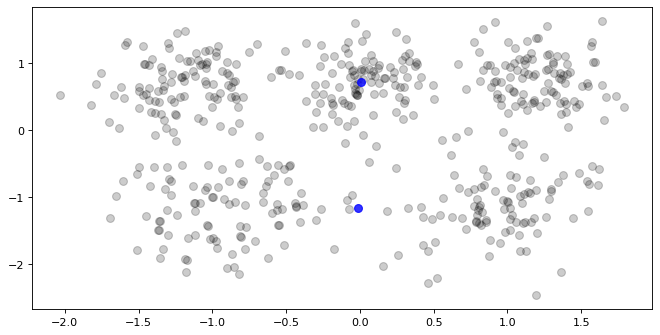

In [388]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(Normalized_Data3[:,0],Normalized_Data3[:,1], s = 50, c = 'black', alpha = 0.2)
plt.scatter(Hist[:,0],Hist[:,1], s = 50, c = 'blue', alpha = 0.8)
plt.show()

**** your answer****

As you can see, the results are radically different. You should not take this to mean that data should always be normalized. In some problems, the relative values of the dimensions are meaningful and should be preserved (e.g. the coordinates of earthquake epicenters in a region). But in others, the dimensions are on entirely different scales (e.g. age in years v.s. income in thousands of dollars).
Proper pre-processing of data for clustering is often part of the art of machine learning.